In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/home/xandao/Imagens/br_dataset/RGB/specific_epithet_trusted/512/5/info_levels.csv', index_col=None, header=0, sep=';', lineterminator='\n')
df

,levels,count,f,dst,paths,seq
0,abutiloides,8,1,/home/xandao/Imagens/br_dataset/RGB/specific_e...,['/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6f...,"[9416, 10009, 10651, 12428, 25112, 37910, 3847..."
1,aduncum,377,2,/home/xandao/Imagens/br_dataset/RGB/specific_e...,['/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6f...,"[7220, 7221, 7222, 7234, 7742, 7757, 8224, 868..."
2,aequale,30,3,/home/xandao/Imagens/br_dataset/RGB/specific_e...,['/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6f...,"[8727, 9316, 10163, 11517, 12577, 20200, 21125..."
3,alata,81,4,/home/xandao/Imagens/br_dataset/RGB/specific_e...,['/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6f...,"[6857, 6861, 6862, 6863, 6864, 7565, 7859, 986..."
4,alatabaccum,28,5,/home/xandao/Imagens/br_dataset/RGB/specific_e...,['/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6f...,"[26207, 30555, 30557, 30558, 30560, 30561, 305..."
...,...,...,...,...,...,...
230,viminifolium,29,231,/home/xandao/Imagens/br_dataset/RGB/specific_e...,['/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6f...,"[9467, 9561, 10292, 10742, 12195, 12196, 12197..."
231,vitaceum,13,232,/home/xandao/Imagens/br_dataset/RGB/specific_e...,['/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6f...,"[6147, 9224, 35692, 35694, 35699, 35701, 37994..."
232,wachenheimii,5,233,/home/xandao/Imagens/br_dataset/RGB/specific_e...,['/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6f...,"[35702, 35704, 35705, 35708, 35709]"
233,warmingii,6,234,/home/xandao/Imagens/br_dataset/RGB/specific_e...,['/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6f...,"[8103, 8616, 9965, 39042, 40038, 40319]"


In [4]:
repeated_values = df.pivot_table(index=['count'], aggfunc='size')
repeated_values[5]

18

In [5]:
min=df['count'].min()
max=df['count'].max()
ranges = pd.interval_range(start=min, end=max, periods=30)
print(len(ranges), min, max)
ranges

30 5 620


IntervalIndex([(5.0, 25.5], (25.5, 46.0], (46.0, 66.5], (66.5, 87.0], (87.0, 107.5] ... (517.5, 538.0], (538.0, 558.5], (558.5, 579.0], (579.0, 599.5], (599.5, 620.0]], dtype='interval[float64, right]')

In [6]:
import math
y = [repeated_values.loc[math.ceil(r.left): math.floor(r.right)].sum() for r in ranges]
x = ['%s-%s' % (int(math.ceil(r.left)), int(math.floor(r.right))) for r in ranges]
x_copy = x[::2].copy()
x_copy.append(x[len(x)-1])
y

[142,
 37,
 19,
 8,
 3,
 7,
 5,
 2,
 5,
 4,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

Text(0, 0.5, 'Number of species')

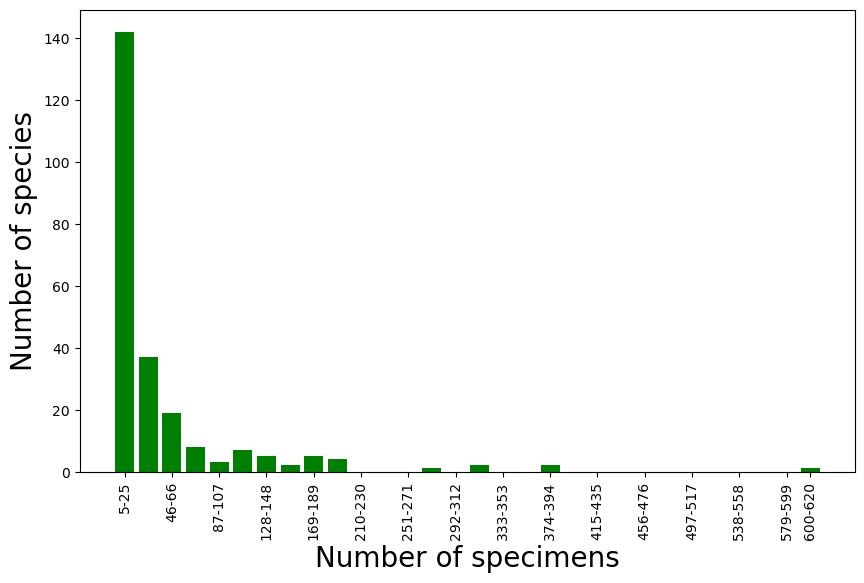

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
plt.bar(x, y, align='center', color='green')
plt.xticks(x_copy, rotation='vertical')
plt.xlabel('Number of specimens', fontdict={'fontsize': 20})
plt.ylabel('Number of species', fontdict={'fontsize': 20})